In [244]:
from flask import Flask, render_template, request

# create a Flask app instance
app = Flask(__name__)

In [245]:
# define a search function that returns a list of result items
def search(query):
    # TODO: replace this with your search logic
    results = [
        {
            'ID': '1',
            'Title': 'Sample Result 1',
            'Author': 'John Doe',
            'Link': 'https://www.example.com/result1',
            'Sequence': [1, 2, 3]
        },
        {
            'ID': '2',
            'Title': 'Sample Result 2',
            'Author': 'Jane Smith',
            'Link': 'https://www.example.com/result2',
            'Sequence': [4, 5, 6]
        }
    ]
    return results

# define a route for the home page
@app.route('/', methods=['GET', 'POST'])
def home():
    # if the user submitted a search query
    if request.method == 'POST':
        # get the search query from the form
        query = request.form.get('query')
        # perform the search
        results = search(query)
        # pass the results to the template
        return render_template('index.html', query=query, results=results)
    # if the user loaded the page without submitting a search query
    else:
        return render_template('index.html')

In [246]:
# run the app
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2023 16:34:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 16:34:31] "GET /static/style.css HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 16:34:31] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/May/2023 16:34:35] "POST / HTTP/1.1" 200 -


In [ ]:
import requests

In [ ]:
def getResults(search_array_doubles):
    search = [int(num) for num in search_array_doubles]
    string = "%2c".join(str(num) for num in search)
    
    url = "https://oeis.org/search?q="+string+"&start=20&fmt=data"
    URL = "https://realpython.github.io/fake-jobs/"
    page = requests.get(URL)

    print(page.text)

Henkel matrix of a sparse_seq = hankel(sparse_seq)

Moores Penrose inversion A^+ = np.linalg.pinv(A)

Hermitian Matrix A^* = A.getH()

Trace A, tr(A) = np.trace(A)

Frobenius Norm ||A||_F = np.linalg.norm(a, 'fro')

L2 Norm, for vectors = np.linalg.norm(x, '2') / np.linalg.norm(x)

A_vec = A.flatten('F')

Where x = A_vec

x_mat = x.reshape(d1, d2,'F')

Where A = (A_vec)_mat

Note ‘F’ means to flatten in column-major (Fortran-style) order

Kronecker product A (x) B = np.kron(A, B)

Weighted L2 norm, x\in C^(d1d2), W \in H_d1xd2, H is a hilbert space for transformations of signals and Matrices?, = x* W x

X \in C^d1 x d2

x* = d1d2 x 1
W = d1 x d2
x = 1 x d1d2

Note x*x = I

Weighted Frobenius norm = ||X||_F(W) = sqrt(<X,X>_F(W)) = sqrt(tr\[(WX)*X\])

Note ||F|| = ||X||_l2



<img src=" 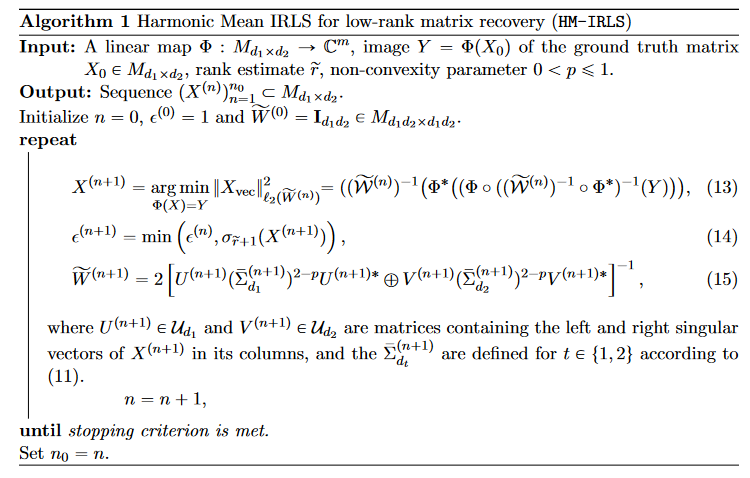" />

In [ ]:
import numpy as np
import scipy as sp
from scipy.linalg import hankel

In [ ]:
def ceil(R):
    return R

def hankel(s):
    return sp.linalg.hankel(s[:len(s)//2+1],s[len(s)//2:])

def P_omega(Y):
    omega = []
    for i,x in enumerate(Y):
        if x != 0:
            omega.append(i)
    return (np.eye(len(Y))[omega])

def weight_tilda(U,S,V,E,X):
    #U, left upper triangular matrix,singular vectors
    #Sigma Values
    #V right upper triangular Matrix, singular vectors
    #R Rank Parameter/Current rank estimate,
    #E is the smoothing parameter
    #X is the matrix we want to change using the weight operator
   
    
    R = min(len(U),len(V))
    
    H = np.zeros([R,R])
    D = np.zeros([R,R])
    
    U = U[:,:R]
    V = V[:,:R]
    """
    print(U.shape)
    print(S.shape)
    print(V.shape)
    print(X.shape)
    print(H.shape)
    print(D.shape)
    #""" 
    
    
    ##################################
    #Building H
    #We assume R to be the size of the sigmas due to the size of the sequence being relatively small, we also set r ~ 2/4
    #meaing R must be larger then 2/4 and with sequences this means we will often have weird things...
    for i in range(R):
        for j in range(R):
            H[i,j] = 2 * (( S[i]**2 + S[j]**2 + 2*(E**2))**-1)
    
    
    ##################################
    #Building D
    for i in range(R):
        D[i,i] = 2 * (( S[i]**2 + 2*(E**2))**-1)
    
    #print(U.shape,H.shape,U.T.shape,X.shape,V.shape,V.T.shape)
    L = U @ (H * (U.T @ X @ V) ) @ V.T
    
    
    
    #M is the ...
    M = U @ D.T @ U.T @ X @ ( np.eye(R) - V @ V.T )
    
    #N is the ...
    #print(R,U.shape,U.T.shape,X.shape,V.shape,D.T.shape,V.T.shape)
    N = ( np.eye(U.shape[0]) - U @ U.T ) @ X @ V @ D.T @ V.T
    
    #O is the ...
    O = (E**-2) * ( np.eye(U.shape[0]) - U @ U.T ) @ X @ ( np.eye(R) - V @ V.T )
    
    return (L+M+N+O)


In [ ]:
def hm_irls(data_vector,rank_estimate,true_rank_parameter,i):
    
    x = data_vector
    P = P_omega(x)
    
    #The unpadded 0 vector of data
    y = x @ P.T
    
    r = true_rank_parameter
    
    n = len(x)
    m = len(y)
    R = rank_estimate
    
    iterations = i
    
    U,S,D = np.linalg.svd(hankel(x))
    
    smoothing=[0]*(iterations)
    smoothing[0] = S[0]

    weights = [0]*(iterations)
    weights[0] = smoothing[0]*np.identity(n)
    
    
    for f in range(1,iterations):
        print(f)
        
        W = weights[f-1]
        
        if np.linalg.det(W) != 0:
            W_i = np.linalg.inv(W)
        
        # We can simplify the following line to make it more computationally efficent by solving directly for z
        #x = W_i @ P.T @ (np.linalg.inv(P@W_i@P.T) @ y )
        #P @ W_i @ P.T * z = Y    => linalg.solve(P@W_i@P.T,y)
        
        #recalculate the data vector using a minimisation method & constraint (4
        x = W_i @ P.T @ (np.linalg.solve(P@W_i@P.T,y) )
        
        
        
        #SVD of the Padded hankel data vector (5)
        U,S,D = np.linalg.svd(hankel(x))
        
        R = min(len(U),len(D))
        
        #print(S)
        
        smoothing[f] = min(smoothing[f-1],S[r+1])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
        
        
        #Calculate each element in the weight matrix with
        # W_ij = e_i.T W @ e_j
        # => vec(e_i.hankel) @ vec(weight_tilda(e_j.hankel))
        W = np.zeros([n,n])
        
                
        for i in range(0,n):
            e_i=[0]*n
            e_i[i]=1
            for j in range(0,n):
                e_j=[0]*n
                e_j[j]=1
                W[i,j] = hankel(e_i).flatten() @ weight_tilda(U,S,D,smoothing[f], hankel(e_j)).flatten()
        weights[f]=W
        print(np.round(x,0))
        print(smoothing[f])
    """    
    for w in weights:
        print("\n\n\n")
        print(np.round(w,0))"""
    for s in smoothing:
        print("\n\n\n")
        print(s)
    return x

In [252]:
hm_irls([0,2,3,0,5,6,7,0,0,0,11,12,13,0,0,0,0,0,0,0,0],0,2,100)

1
[ 0.  2.  3.  0.  5.  6.  7.  0.  0.  0. 11. 12. 13.  0.  0.  0.  0.  0.
  0.  0.  0.]
24.621069317112457
2
[ 1.09226921  2.          3.          1.94899972  5.          6.
  7.          2.30377309  2.01503921  2.91516198 11.         12.
 13.          3.00797035  1.77744535  1.17188358  1.72226044  1.9407293
  2.0004652   0.56974441  1.04143878]
23.260544789673407
3
[ 3.03839212  2.          3.          3.58070866  5.          6.
  7.          4.31218219  4.44418384  4.90277823 11.         12.
 13.          5.29347316  4.52249781  4.09357042  4.45060014  4.11349095
  3.94536895  3.25473218  2.58678218]
16.618723547115565
4
[ 3.55661267  2.          3.          4.95663251  5.          6.
  7.          6.34199268  6.62184022  7.30427967 11.         12.
 13.          7.79184057  7.13954189  6.83522754  6.57601419  6.51529836
  6.18964264  5.51023985  4.79988086]
10.199502754825902
5
[ 3.04161665  2.          3.          5.12690421  5.          6.
  7.          7.8260964   8.49272176  9.

[ 1.21951762  2.          3.          4.00177968  5.          6.
  7.          7.98928071  9.00447054 10.01655681 11.         12.
 13.         13.87761927 14.72299556 15.49662621 16.18880811 16.77588079
 17.24894733 17.59880755 17.81542819]
0.1392675741745754
34
[ 1.21317271  2.          3.          3.99938149  5.          6.
  7.          7.99129442  9.00807308 10.02639184 11.         12.
 13.         13.87204171 14.72397266 15.50497505 16.20498096 16.81246652
 17.2944943  17.66160686 17.89670815]
0.13663511942307346
35
[ 1.20935112  2.          3.          4.00484601  5.          6.
  7.          7.99045282  9.00840029 10.02292531 11.         12.
 13.         13.87052439 14.72904112 15.51305183 16.2200716  16.83096709
 17.34545761 17.71212275 17.9732785 ]
0.13488653660183006
36
[ 1.20756265  2.          3.          4.00800235  5.          6.
  7.          7.99471939  9.00906425 10.02488275 11.         12.
 13.         13.87418108 14.73290766 15.52079196 16.2320611  16.8562169
 17.365

[ 1.09582976  2.          3.          4.002259    5.          6.
  7.          7.99599573  9.00523018 10.01330432 11.         12.
 13.         13.93786534 14.86844128 15.76911754 16.63155373 17.45611822
 18.23415098 18.95534338 19.63430014]
0.06344922861477492
66
[ 1.09510809  2.          3.          4.00204162  5.          6.
  7.          7.99975798  9.00720759 10.01621042 11.         12.
 13.         13.93698645 14.87134529 15.77335416 16.64009459 17.47504907
 18.25033104 18.97820498 19.66685169]
0.061024006444254736
67
[ 1.09053766  2.          3.          3.99768681  5.          6.
  7.          7.99636878  9.00728439 10.01543294 11.         12.
 13.         13.93761394 14.87049573 15.78126145 16.6491016  17.4783223
 18.2761834  19.01594602 19.69576729]
0.056131226785233766
68
[ 1.08841739  2.          3.          3.99782532  5.          6.
  7.          7.99840973  9.01000624 10.01487219 11.         12.
 13.         13.94164091 14.87097795 15.78062505 16.65533196 17.487124
 18.27

[ 1.03896468  2.          3.          3.99769849  5.          6.
  7.          8.00097102  9.00486646 10.00729834 11.         12.
 13.         13.97100682 14.94168268 15.89802569 16.84273121 17.76899059
 18.6764709  19.56876024 20.43076714]
0.024404132053362157
98
[ 1.03841792  2.          3.          3.99917234  5.          6.
  7.          8.00064737  9.00567059 10.00732618 11.         12.
 13.         13.9717821  14.94243048 15.9007728  16.84721586 17.77485759
 18.68649445 19.57494124 20.44776648]
0.024360361347982327
99
[ 1.03858609  2.          3.          4.00048807  5.          6.
  7.          7.9998913   9.00422769 10.006983   11.         12.
 13.         13.97367095 14.9445533  15.90435221 16.84944572 17.77913223
 18.68994232 19.57975556 20.45534955]
0.024360361347982327




44.908551621974446




24.621069317112457




23.260544789673407




16.618723547115565




10.199502754825902




4.383924334325748




1.2707576702344636




0.39803861553766784




0.2868106784455963



array([ 1.03858609,  2.        ,  3.        ,  4.00048807,  5.        ,
        6.        ,  7.        ,  7.9998913 ,  9.00422769, 10.006983  ,
       11.        , 12.        , 13.        , 13.97367095, 14.9445533 ,
       15.90435221, 16.84944572, 17.77913223, 18.68994232, 19.57975556,
       20.45534955])

In [184]:
                                                                                                                                                                                                                                                                                                                                                                               Y = [0,0,1,0,3]

a = np.array(Y)
d = np.diag(a)

Y @ (P_omega(Y))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 5)

In [172]:
x1 = np.arange(9.0).reshape((3, 3))

x2 = np.arange(3.0)

x1[0]

array([0., 1., 2.])

In [15]:
x1

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [16]:
x2

array([0., 1., 2.])

In [119]:
n= 5
q = sp.linalg.hankel([0,1,1,2,3],[3,5,8,13,21])

A,B,C = np.linalg.svd(q)

j = [0]*(5*2-1)
j[4]=1
l = sp.linalg.hankel(j[:5],j[4:])

print(l)

print(q)


print(np.matrix(weight_tilda(A,B,C,5,2,l)))


[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]
[[ 0  1  1  2  3]
 [ 1  1  2  3  5]
 [ 1  2  3  5  8]
 [ 2  3  5  8 13]
 [ 3  5  8 13 21]]
[[ 0.03200597 -0.35439914  0.14522239  0.28910757  0.41941098]
 [ 0.02223238 -0.24453528  0.10015322  0.20018328  0.28910757]
 [ 0.01125869 -0.12258992  0.05034265  0.10015322  0.14522239]
 [-0.0266892   0.29985393 -0.12258992 -0.24453528 -0.35439914]
 [ 0.0029718  -0.0266892   0.01125869  0.02223238  0.03200597]]


In [59]:
np.zeros([5,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [148]:
int(np.floor(4.3))

4

In [151]:
for i in range(0,5+1):
    print(-i)
for i in range(5+1,10 ):
    print(i)

0
-1
-2
-3
-4
-5
6
7
8
9


In [186]:
a=[1,2,3,4,5,6,7,8]
a[:3]
r = 3
d1 = len(a) - r + 1
d2 = len(a) - d1 + 1
print(d1,d2)
print(len(a)//2+1)
print(sp.linalg.hankel(a[:len(a)//2+1],a[len(a)//2:]))

6 3
5
[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]


In [305]:
y=[1,2,3,3,4,4,4,4,5]
print(np.eye(len(y)))
print(len(np.eye(len(y))))
e_i=[0]*(len(y))
He_i = sp.linalg.hankel(e_i)
print(len(He_i))
print(He_i)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9
9
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


In [405]:
A,B,C = np.linalg.svd(np.zeros([5,6]))
print(A.shape)
print(B.shape)
print(C.shape)
print(A@B@C.T)

(5, 5)
(5,)
(6, 6)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

In [205]:
for f in range(1,10):
        print(f)

1
2
3
4
5
6
7
8
9
